In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
sns.set(style="whitegrid")

np.random.seed(42)
data_100 = np.random.normal(loc=3, scale=1, size=100)
data_10000 = np.random.normal(loc=3, scale=1, size=10000)

In [9]:
stats_100 = pd.Series(data_100, name="100 obserwacji")

stats_10000 = pd.Series(data_10000, name="10 000 obserwacji")

In [10]:
def oblicz_statystyki(dane):
    return {
        "Średnia": np.mean(dane),
        "Mediana": np.median(dane),
        "Moda": stats.mode(dane, keepdims=True)[0][0],
        "Q1": np.percentile(dane, 25),
        "Q3": np.percentile(dane, 75),
        "Zakres": np.ptp(dane),
        "IQR": stats.iqr(dane),
        "Wariancja": np.var(dane, ddof=1),
        "Odchylenie standardowe": np.std(dane, ddof=1),
        "Asymetria": stats.skew(dane),
    }

statystyki_100 = oblicz_statystyki(data_100)
statystyki_10000 = oblicz_statystyki(data_10000)

In [11]:
stat_df = pd.DataFrame([statystyki_100, statystyki_10000], index=["100 obserwacji", "10 000 obserwacji"])

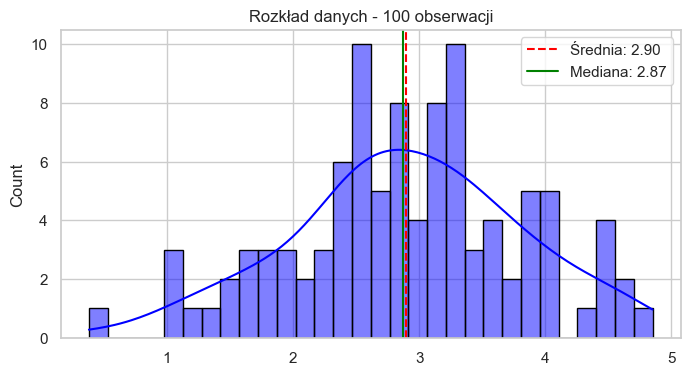

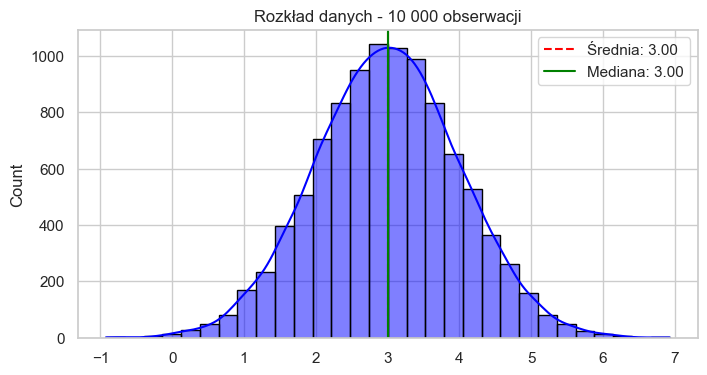

In [12]:
def rysuj_histogram(dane, tytul):
    plt.figure(figsize=(8, 4))
    sns.histplot(dane, bins=30, kde=True, color="blue", edgecolor="black")
    plt.axvline(np.mean(dane), color='red', linestyle='--', label=f'Średnia: {np.mean(dane):.2f}')
    plt.axvline(np.median(dane), color='green', linestyle='-', label=f'Mediana: {np.median(dane):.2f}')
    plt.title(tytul)
    plt.legend()
    plt.show()

rysuj_histogram(data_100, "Rozkład danych - 100 obserwacji")
rysuj_histogram(data_10000, "Rozkład danych - 10 000 obserwacji")

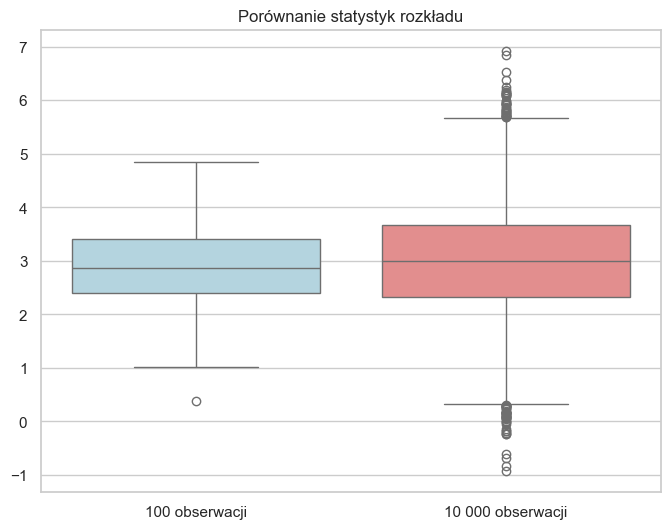

Korelacja między próbkami: -0.1684
                    Średnia   Mediana      Moda        Q1        Q3    Zakres  \
100 obserwacji     2.896153  2.873044  0.380255  2.399094  3.405952  4.472023   
10 000 obserwacji  2.998821  2.998835 -0.922400  2.326435  3.672032  7.848638   

                        IQR  Wariancja  Odchylenie standardowe  Asymetria  
100 obserwacji     1.006858   0.824770                0.908168  -0.175268  
10 000 obserwacji  1.345597   1.007497                1.003741   0.002161  


In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[data_100, data_10000], palette=["lightblue", "lightcoral"])
plt.xticks([0, 1], ["100 obserwacji", "10 000 obserwacji"])
plt.title("Porównanie statystyk rozkładu")
plt.show()

korelacja = np.corrcoef(data_100, np.random.choice(data_10000, size=100))[0, 1]
print(f"Korelacja między próbkami: {korelacja:.4f}")

print(stat_df)


W większym zbiorze statystyki są bardziej czytelne. W mniejszym zbiorze wyniki się wahają. To pokazuje, że im więcej danych, tym lepej można analizować dane